# IDFT
IDFT(Inverse Discrete Fourier Transform), 傅里叶逆变换，可以将频域信号转换到时域中, 它的公式非常简单：
$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j2\pi kn/N}
$$

$X[k]$：离散频率下标为k时的频率大小

$x[n]$: 离散时域信号序列

$N$: 信号序列的长度，也就是采样的个数

对比我们之前讲过的DFT，两者公式类似，但是注意在DFT中指数带**负号**，而IDFT中不带

# 从矩阵的角度看IDFT

## DFT的矩阵表示
讲IDFT之前，我们先复习DFT的矩阵表示形式：
$$
\begin{bmatrix}
s_0^0 & s_0^1 & \cdots & s_0^{N-1} \\
\vdots & \vdots  & \vdots &  \vdots\\
s_k^0 & s_k^1 & \cdots & s_k^{N-1} \\
\vdots & \vdots  & \ddots &  \vdots\\
s_{N-1}^0 & s_{N-1}^1 & \cdots & s_{N-1}^{N-1} \\
\end{bmatrix}
\begin{bmatrix}
x[0] \\
x[1] \\
\vdots\\
x[n] \\
\vdots \\
x[N-1]
\end{bmatrix} = \begin{bmatrix}
X[0] \\
X[1] \\
\vdots\\
X[k] \\
\vdots \\
X[N-1]
\end{bmatrix}
$$
$S$矩阵中的每一行都是一个$S_k$向量，$S_k = e^{-j2\pi kn/N}, n=0,1,\cdots,N-1$，进一步简化上面的表示，得到：
$$
\begin{bmatrix}
\cdots & S_0 & \cdots \\
       & \vdots &     \\
\cdots & S_k & \cdots \\
       & \vdots &     \\
\cdots & S_{N-1} & \cdots \\
\end{bmatrix}
\begin{bmatrix}
x[0] \\
x[1] \\
\vdots\\
x[n] \\
\vdots \\
x[N-1]
\end{bmatrix} = \begin{bmatrix}
X[0] \\
X[1] \\
\vdots\\
X[k] \\
\vdots \\
X[N-1]
\end{bmatrix}
$$

## IDFT的矩阵表示
从IDFT的公式，可以看出，其实IDFT和DFT表示是一样的，只是对象发生了变化。具体来说，有两个变化：
  + 由于指数部分不再有符号，$S_k$进行了共轭操作，得到$S_k^*$
  + 输入是频率信息X[k]
    
因此，矩阵表示变成了下面这样：
$$
\begin{bmatrix}
\cdots & S_0^* & \cdots \\
       & \vdots &     \\
\cdots & S_k^* & \cdots \\
       & \vdots &     \\
\cdots & S_{N-1}^* & \cdots \\
\end{bmatrix}
\begin{bmatrix}
X[0] \\
X[1] \\
\vdots\\
X[n] \\
\vdots \\
X[N-1]
\end{bmatrix} = \begin{bmatrix}
x[0] \\
x[1] \\
\vdots\\
x[k] \\
\vdots \\
x[N-1]
\end{bmatrix}
$$


# Talk is cheap, show me the code

接下来就简单多了，我们将先介绍如何使用scipy中ifft，然后自己动手实现一份ifft

导入必要的包

In [4]:
import numpy as np
from scipy.fftpack import fft, ifft

import matplotlib.pyplot as plt

%matplotlib notebook

生成信号用于测试

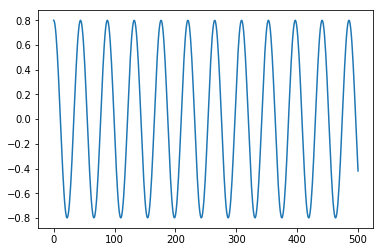

In [18]:
def generate_sine(N, A, fs, f0, phi):
    '''
    N : number of samples
    A : amplitude
    fs: sample rate
    f0: frequency
    phi: initial phase
    '''
    
    T = 1/fs
    n = np.arange(N)
    x = A*np.cos( 2*np.pi*f0*n*T + phi )
    
    return x

# generate signal
N = 501
A = 0.8
fs = 44100
f0 = 1000
phi = 0.0

x = generate_sine(N, A, fs, f0, phi)

plt.figure()
plt.plot(x)
plt.show()

使用scipy中的ifft

/home/hw/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/hw/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


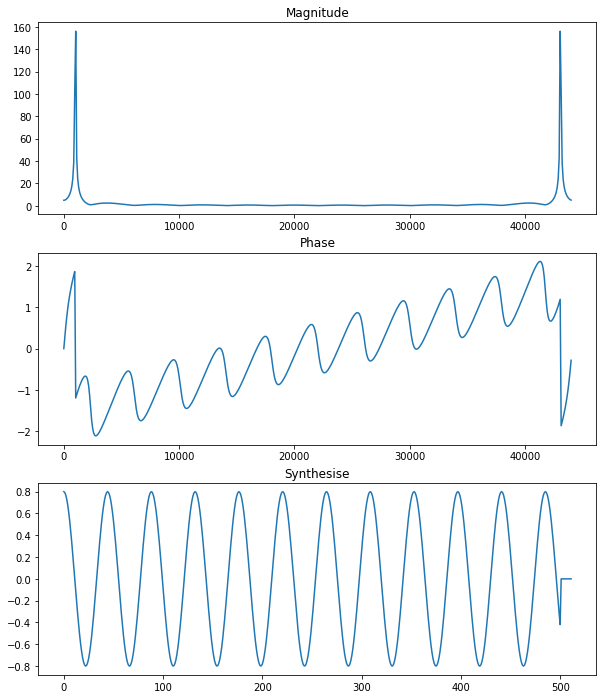

In [27]:
# fft the signal
N = 512                       # fft size
X = fft(x, N)
mX = np.abs(X)
pX = np.angle(X)

freq_axis = np.arange(N)/N * fs
plt.figure(figsize=(10, 12))
ax = plt.subplot(3,1,1)
plt.plot(freq_axis, mX)
ax.set_title('Magnitude')

ax = plt.subplot(3,1,2)
plt.plot(freq_axis, pX)
ax.set_title('Phase')


# ifft it
ifft_x = ifft(X)
ax = plt.subplot(3,1,3)
plt.plot(ifft_x)
ax.set_title('Synthesise')

plt.show()

### 自己动手写ifft

只有两个地方要注意：
+ 不要忘记乘上 1/N
+ $S_k^*$是$S_k$向量的共轭后的结果。反映在代码中，就是$S_k^*$不要共轭操作之间返回

/home/hw/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


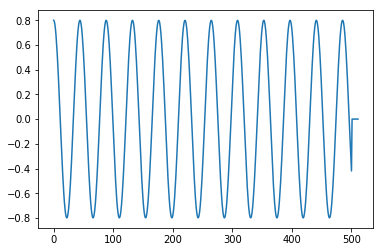

In [31]:
def generate_complex_sinusoid(n, N):
    '''
    n : time index (or frequency index)
    N : number of sample
    '''
    
    k = np.arange(N)
    
    c_sin = np.exp(1j*2*np.pi*k*n/N)
    
    return c_sin

# ifft loop
ifft_x = np.array([])

for i in range(N):
    s = generate_complex_sinusoid(i, N)
    ifft_x = np.append(ifft_x, 1/N * np.sum(X*s))

plt.figure()
plt.plot(ifft_x)
plt.show()

# 总结

通过自己动手，我们发现IDFT的原来和实现很简单，几乎与DFT一模一样，唯一需要注意的点就是$S_k^*$